<a href="https://colab.research.google.com/github/edyy-Z/Data-Analysis-Class-Works/blob/main/Lab_2_Fall_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Yongjun Zhu**

Lab #2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('sample_data/House Price Dataset.csv')

In [ ]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


**1-- Recode 2 different variables into new categories. They can both be continuous-ish or both be nominal-ish, or one of each. Tell me what you did and explain the variable(s).**




My assumption is that newly built houses are generally more expensive than older ones.

In [ ]:
df.groupby('YearBuilt')['Price'].mean()

,Price
YearBuilt,
1900,532297.583333
1901,554257.960000
1902,487525.428571
1903,364482.333333
1904,695236.933333
...,...
2019,592602.437500
2020,548988.500000
2021,483393.750000


It is hard to conclude a general result from the chart above. Thus, let's recode the categories to go up in a logical way.

The first variable I choose is the house price. I decide to break it into there levels based on the price level.

In [ ]:
conditions = [
    (df['Price']<=333333),
    (df['Price']>333333) & (df['Price']<=666666),
    (df['Price']>666666)
]
choices = ['Low price', 'Moderate price','High price']
df['Price_level'] = np.select(conditions, choices)
df.Price_level.value_counts()

,count
Price_level,
High price,744
Moderate price,682
Low price,574


<Axes: xlabel='Price_level', ylabel='Price'>

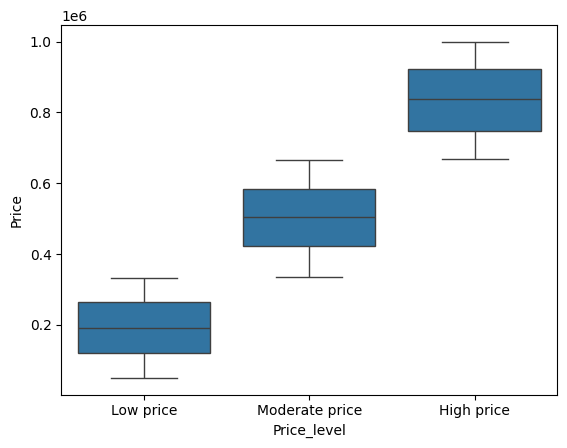

In [ ]:
sns.boxplot(x='Price_level', y='Price', data=df)

In [ ]:
pd.crosstab(df['Price'], df['Price_level'])

Price_level,High price,Low price,Moderate price
Price,,,
50005,0,1,0
50064,0,1,0
51082,0,1,0
51845,0,1,0
52024,0,1,0
...,...,...,...
997719,1,0,0
998084,1,0,0
998128,1,0,0


The Second Variable I chose was the year when the houses were built.

In [ ]:
df['house_condition'] = pd.cut(df['YearBuilt'],
                   bins=[1900, 1931, 1963, 1996, float('inf')],
                   right=True,
                  labels=["Old", "Fairly Old", "Fairly New", "New"], ordered=True)

In [ ]:
df.house_condition.value_counts(sort=False, dropna=False)

,count
house_condition,
Old,521
Fairly Old,492
Fairly New,520
New,455
NaN,12


In [ ]:
pd.crosstab(df['YearBuilt'], df['house_condition'])

house_condition,Old,Fairly Old,Fairly New,New
YearBuilt,,,,
1901,25,0,0,0
1902,14,0,0,0
1903,12,0,0,0
1904,15,0,0,0
1905,16,0,0,0
...,...,...,...,...
2019,0,0,0,16
2020,0,0,0,16
2021,0,0,0,12


<Axes: xlabel='house_condition', ylabel='YearBuilt'>

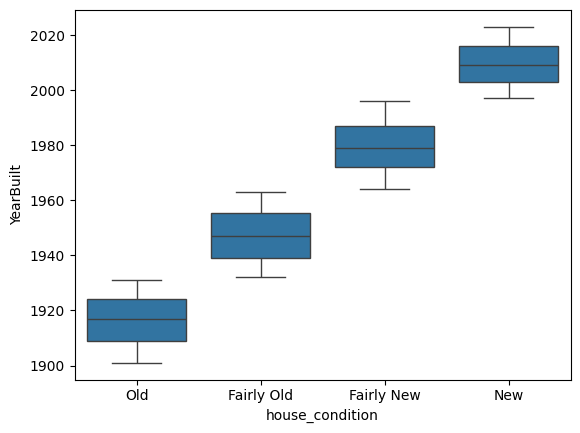

In [ ]:
sns.boxplot(x='house_condition', y='YearBuilt', data=df)

Again, with our second variable, all the recoded appear to check out.  Here we see that our distribution of levels is more equally-sized groups.

**2-- Use one (or both) of your recoded variables to do a cross-tabulation. Explain your results.**


I will use my 2 recoded variables in my cross-tabulation.  I expect these two variables to be related together to a degree.

In [ ]:
pd.crosstab(df.house_condition, df.Price_level, normalize='columns')*100

Price_level,High price,Low price,Moderate price
house_condition,,,
Old,25.575101,27.719298,25.625920
Fairly Old,25.845737,23.157895,24.889543
Fairly New,26.928281,25.964912,25.478645
New,21.650880,23.157895,24.005891


<ipython-input-60-5dd82e61f623>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df.groupby(variables).size()
<ipython-input-60-5dd82e61f623>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby(variables[0]).size()


<Axes: xlabel='house_condition'>

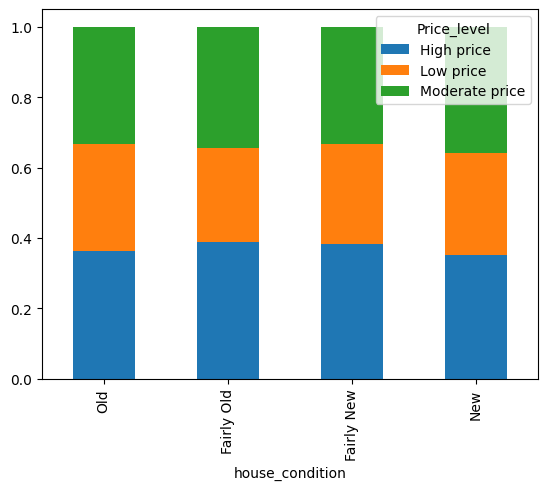

In [ ]:
variables = ['house_condition', 'Price_level']
group_counts = df.groupby(variables).size()
total_counts = df.groupby(variables[0]).size()
percentages = group_counts / total_counts
percentages.unstack().plot(kind='bar', stacked=True)

The cross-tabulation does not shows a clearly correlation between price and years houses were built. The proportions of high, moderate, and low prices seem relatively similar across all house conditions. This suggests that the condition of the house (from "Old" to "New") does not drastically alter the distribution of price levels.

**3-- Run a correlation of one variable with another variable; make all of the recodes necessary to make the correlation as easy to interpret as possible; and explain your results.**

I will investigate the correlation between the housing price and how many floors the house has.  I expect that houses have more floors tend to have a higher price.

In [ ]:
df['Floors'].corr(df['Price'])

0.0558902596892138


The correlation between Floors and Price is approximately 0.056. This does not suggest there is a clear correlation between floors and housing price. Honestly, even if the correlation is positive which is similar to what I was expected, it is not as strong an association as I expected ... not sure why that would be. The reason, probably, is there are so many conditions like year build, area, and location may affect the housing price, and thus I should not only consider one variable.


**4-- Identify the most extreme cases on some variable.  Interpret the results.**


I was curious about the price of the house that has the largest area and the house that has the smallest.

In [ ]:
df[['Price', 'Area']].dropna().sort_values(by='Area', ascending=False).head(5)

,Price,Area
205,139460,4999
1122,286887,4997
232,784184,4996
160,369733,4996
299,286028,4995


In [ ]:
df[['Price', 'Area']].dropna().sort_values(by='Area', ascending=True).head(5)

,Price,Area
1516,723832,501
1414,302990,501
1214,184962,502
728,850118,503
318,169574,504


The house with largest area priced only 139460; while the house with smallest area priced 723832 which is about 6 times to the largest one. This result shows that in this data set we can not simply use area of houses to estimate the housing price.